In [38]:
# 分类
# from sklearn.ensemble import AdaBoostClassifier

# 回归
import pandas as pd
from pandas import DataFrame
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# 记载数据
data = load_boston()
df_data = pd.DataFrame(data.data)
df_target = pd.DataFrame(data.target)
df_data

# 分割数据
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)

# 使用AdaBoost回归模型
regressor = AdaBoostRegressor()
regressor.fit(train_x,train_y)
pred_y = regressor.predict(test_x)
pred_y
mse = mean_squared_error(test_y, pred_y)
print('*'*20,'\n')
print('房价预测结果:')
print(pd.DataFrame(pred_y))
print('均方误差:\n', round(mse,2))

# 使用回归分析模型分析这个数据集, 比如决策树回归和KNN回归

# 使用决策树回归模型

from sklearn.tree import DecisionTreeRegressor

dec_regressor = DecisionTreeRegressor()
dec_regressor.fc1it(train_x, train_y)
pred_y = dec_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print('\n\n','*'*20,'\n')
print('房价预测结果:')
print(pd.DataFrame(pred_y))
print("决策树均方误差:\n", round(mse,2))


# 使用KNN回归
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(train_x, train_y)
pred_y = knn_regressor.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print('\n\n','*'*20,'\n')
print('房价预测结果:')
print(pd.DataFrame(pred_y))
print('KNN均方误差:\n', round(mse,2))


******************** 

房价预测结果:
             0
0    19.524324
1    10.896429
2    14.176238
3    17.930978
4    24.956604
..         ...
122  12.257813
123  20.163134
124  20.742857
125  16.488462
126  43.400000

[127 rows x 1 columns]
均方误差:
 18.74


 ******************** 

房价预测结果:
        0
0    18.8
1     8.3
2    14.2
3    14.6
4    22.8
..    ...
122  10.4
123  20.0
124  21.2
125  17.4
126  37.6

[127 rows x 1 columns]
决策树均方误差:
 26.33


 ******************** 

房价预测结果:
         0
0    18.82
1     9.94
2    10.48
3    13.84
4    20.66
..     ...
122  12.58
123  23.42
124  21.94
125  17.00
126  32.98

[127 rows x 1 columns]
KNN均方误差:
 27.87


x:
[[ 1.62434536 -0.61175641 -0.52817175 ... -0.7612069   0.3190391
  -0.24937038]
 [ 1.46210794 -2.06014071 -0.3224172  ... -0.87785842  0.04221375
   0.58281521]
 [-1.10061918  1.14472371  0.90159072 ... -0.93576943 -0.26788808
   0.53035547]
 ...
 [-0.93116013 -1.66204029  0.30451552 ... -0.13420095  0.29183149
  -0.43300684]
 [-1.3787448   0.83384136 -1.53900483 ...  0.89981334 -1.44271785
   2.51028547]
 [ 0.82776805  2.04855517  2.77822335 ...  0.12579842 -0.1916412
   0.67553921]]


 ******************** 


y:
[ 1.  1. -1. ... -1.  1.  1.]


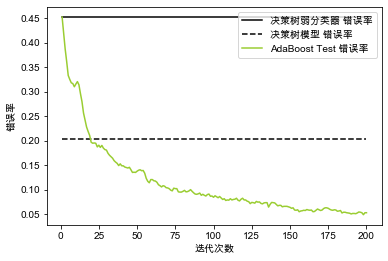

In [41]:
# 测试分类器准确率
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# 设置AdaBoost迭代次数
n_estimators = 200

# 生成数据
x,y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
print(f'x:\n{x}')
print('\n\n','*'*20,'\n\n')
print(f'y:\n{y}')

# 从12000个数据中取前2000行为作为测试集，其余作为训练集
train_x, train_y = x[2000:],y[2000:]
test_x, test_y = x[:2000], y[:2000]

# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)

# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
dt_err = 1.0-dt.score(test_x, test_y)

# AdaBoost分类器
ada = AdaBoostClassifier(base_estimator = dt_stump, n_estimators = n_estimators)
ada.fit(train_x, train_y)

# 三个分类器的错误率可视化
fig = plt.figure()

# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 正常显示中文
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label='决策树弱分类器 错误率')
ax.plot([1, n_estimators], [dt_err]*2, 'k--', label='决策树模型 错误率')
ada_err = np.zeros((n_estimators,))

# 便利每次迭代结果， i为迭代次数， pred_y为预测结果
for i, pred_y in enumerate(ada.staged_predict(test_x)):
    # 统计错误率
    ada_err[i]  = zero_one_loss(pred_y, test_y)

# 绘制每次迭代的AdaBoost错误率
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 错误率', color='yellowgreen')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()

In [88]:
# 作业：AdaBoost预测泰坦尼克生存率
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# 数据加载
train_data = pd.read_csv('data/Titanic_Data/train.csv')
test_data = pd.read_csv('data/Titanic_Data/test.csv')
df = pd.DataFrame(test_data)
df

# 清洗数据
# 清洗年龄
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
# 清洗票价
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

# 观察Embarked字段的取值
print(train_data['Embarked'].value_counts())
# 补全Embarked缺失值
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)


# 选择特征
# print(train_data.columns)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]

# 符号化特征
dvec=DictVectorizer(sparse=False)
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))
test_features=dvec.fit_transform(test_features.to_dict(orient='record'))
dvec.feature_names_

# AdaBoost模型
ada = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=200)
ada.fit(train_features, train_labels)

print(f'Ada分类器准确率为:{np.mean(cross_val_score(ada, train_features, train_labels, cv=10))}')

S    644
C    168
Q     77
Name: Embarked, dtype: int64


TypeError: No loop matching the specified signature and casting was found for ufunc true_divide